# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

In [64]:
import pandas as pd

In [65]:
raw_df = pd.read_csv('dataset_sheet.csv')

In [66]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   prompt  1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [67]:
raw_df

,prompt,label
0,"Can I send an email, please?",send
1,I'd like to compose an email.,send
2,I need to send an email.,send
3,Could you help me write an email?,send
4,Is it possible to send an email with you?,send
...,...,...
995,"Hey, can you open this email in a different ap...",unknown
996,"This email makes me hungry! Can you add ""order...",unknown
997,What if I replied to this email with a GIF? Wo...,unknown
998,Can you translate this email into pirate talk?...,unknown


In [68]:
unique_labels = raw_df['label'].unique()

print(unique_labels)

['send' 'list' 'trash' 'read' 'reply' 'untrash' 'forward' 'star'
 'trash_list' 'unknown']


In [69]:
df = raw_df[raw_df['label'] != 'unknown']
df = df[df['label'] != 'unknown']

In [70]:
df

,prompt,label
0,"Can I send an email, please?",send
1,I'd like to compose an email.,send
2,I need to send an email.,send
3,Could you help me write an email?,send
4,Is it possible to send an email with you?,send
...,...,...
895,Can you show me my deleted emails?,trash_list
896,I need to see what I trashed.,trash_list
897,Open my trash.,trash_list
898,Bring up my deleted items from the trash.,trash_list


In [71]:
unique_labels = df['label'].unique()

print(unique_labels)

['send' 'list' 'trash' 'read' 'reply' 'untrash' 'forward' 'star'
 'trash_list']


In [72]:
categorical_cols = ['label']

## Encoding Target cols

In [73]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
encoded_cols

['label_forward',
 'label_list',
 'label_read',
 'label_reply',
 'label_send',
 'label_star',
 'label_trash',
 'label_trash_list',
 'label_unknown',
 'label_untrash']

In [75]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [76]:
df

,prompt,label,label_forward,label_list,label_read,label_reply,label_send,label_star,label_trash,label_trash_list,label_unknown,label_untrash
0,"Can I send an email, please?",send,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,I'd like to compose an email.,send,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,I need to send an email.,send,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Could you help me write an email?,send,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Is it possible to send an email with you?,send,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
895,Can you show me my deleted emails?,trash_list,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
896,I need to see what I trashed.,trash_list,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
897,Open my trash.,trash_list,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
898,Bring up my deleted items from the trash.,trash_list,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
df = df.drop('label', axis=1)

In [78]:
df

,prompt,label_forward,label_list,label_read,label_reply,label_send,label_star,label_trash,label_trash_list,label_unknown,label_untrash
0,"Can I send an email, please?",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,I'd like to compose an email.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,I need to send an email.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Could you help me write an email?,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Is it possible to send an email with you?,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
895,Can you show me my deleted emails?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
896,I need to see what I trashed.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
897,Open my trash.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
898,Bring up my deleted items from the trash.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
target_cols = encoded_cols

In [80]:
for col in target_cols:
    print(df[col].value_counts(normalize=True))

label_forward
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_list
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_read
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_reply
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_send
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_star
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_trash
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_trash_list
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64
label_unknown
0.0    1.0
Name: proportion, dtype: float64
label_untrash
0.0    0.888889
1.0    0.111111
Name: proportion, dtype: float64


In [81]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [82]:
train_df

,prompt,label_forward,label_list,label_read,label_reply,label_send,label_star,label_trash,label_trash_list,label_unknown,label_untrash
10,I have an email to send.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
334,Execute text-to-speech for the open email.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Is it cool if I use you to erase this email?,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
678,Can you make forwarding this email as smooth a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,Can you narrate this email for me?,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,Show me my emails in chronological order.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,Can you make this email disappear forever? I d...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,Is there a way to access my deleted emails for...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
435,"Dude, draft a reply for me, please.",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

In [83]:
from torchtext.data.utils import get_tokenizer

In [84]:
tokenizer = get_tokenizer('basic_english')

In [85]:
sample_prompt = train_df.prompt.values[0]

In [86]:
sample_prompt

'I have an email to send.'

In [87]:
sample_prompt_tokens = tokenizer(sample_prompt)
sample_prompt_tokens[:10]

['i', 'have', 'an', 'email', 'to', 'send', '.']

In [88]:
from torchtext.vocab import build_vocab_from_iterator

In [89]:
prompt_tokens = df.prompt.map(tokenizer)

In [90]:
prompt_tokens

0                [can, i, send, an, email, ,, please, ?]
1             [i, ', d, like, to, compose, an, email, .]
2                      [i, need, to, send, an, email, .]
3            [could, you, help, me, write, an, email, ?]
4      [is, it, possible, to, send, an, email, with, ...
                             ...                        
895         [can, you, show, me, my, deleted, emails, ?]
896              [i, need, to, see, what, i, trashed, .]
897                                 [open, my, trash, .]
898    [bring, up, my, deleted, items, from, the, tra...
899                        [show, me, the, mail, bin, .]
Name: prompt, Length: 900, dtype: object

In [91]:
VOCAB_SIZE = 5000

In [92]:
unk_token = '<unk>'
pad_token = '<pad>'

In [93]:
vocab = build_vocab_from_iterator(prompt_tokens,
                                  specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

In [94]:
len(vocab)

807

In [95]:
l = vocab.get_itos()

In [96]:
l[:20]

['<unk>',
 '<pad>',
 'email',
 'this',
 '?',
 'to',
 '.',
 'you',
 'i',
 'can',
 'the',
 ',',
 'me',
 'a',
 'it',
 "'",
 'my',
 'is',
 's',
 'your']

In [97]:
dict_of_vocab = vocab.get_stoi()
d = dict_of_vocab

In [98]:
# Now, let's take a "slice" of the first 3 items
sliced_dict = {k: d[k] for k in list(d.keys())[:3]}

print(sliced_dict)  # Output: {'a': 1, 'b': 2, 'c': 3}


{'year': 805, 'wrong': 804, 'without': 801}


In [99]:
vocab[pad_token]

1

In [100]:
vocab[unk_token]

0

In [101]:
vocab.set_default_index(vocab[unk_token])

In [102]:
vocab['this']

3

Here the 'harcore' is not in our library hence we get default index value as output

In [103]:
vocab['harcore']

0

#### Dtermine the maximum lenght a sentece can have

according to the below graph we can see that the maximum lenght of the sentence in our train_df is 25 hence we set maxmimum length to 30 because in validation set there can be sentences length more than 25

<Axes: ylabel='Frequency'>

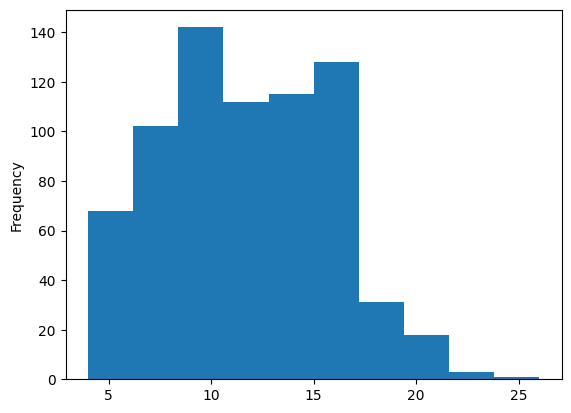

In [104]:
train_df.prompt.map(tokenizer).map(len).plot(kind='hist')

In [105]:
MAX_LENGTH = 30

In [106]:
def pad_tokens(tokens):
    if (len(tokens) >= MAX_LENGTH):
        return tokens[:MAX_LENGTH]
    else:
        return tokens + [pad_token] * (MAX_LENGTH - len(tokens))

In [107]:
import torch

In [108]:
from torch.utils.data import Dataset

In [109]:
class JigsawDataset(Dataset):
    def __init__(self, df, is_test=False):
        self.df = df
        self.is_test = is_test

    def __getitem__(self, index):
        prompt_text = self.df.prompt.values[index]
        prompt_tokens = pad_tokens(tokenizer(prompt_text))
        input = torch.tensor(vocab.lookup_indices(prompt_tokens))
        if self.is_test:
            target = torch.tensor([0,0,0,0,0,0]).float()
        else:
            target = torch.tensor(self.df[target_cols].values[index]).float()
        return input, target

    def __len__(self):
        return len(self.df)

## __getitem__()

The __getitem__ method is a special method in Python that gets called when you access an element of an object using square bracket notation.

for an example you have created an object ob1 from class named hello.the class hello has    'def __getitem__(self, index):' this so when you called like this

ob1[0] , This is invoke -> def __getitem__(self, index):



In [110]:
train_ds = JigsawDataset(train_df)

In [111]:
val_ds = JigsawDataset(val_df)

In [112]:
train_df.head(5)

,prompt,label_forward,label_list,label_read,label_reply,label_send,label_star,label_trash,label_trash_list,label_unknown,label_untrash
10,I have an email to send.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
334,Execute text-to-speech for the open email.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Is it cool if I use you to erase this email?,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
678,Can you make forwarding this email as smooth a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,Can you narrate this email for me?,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
train_ds[0]

(tensor([  8, 110,  29,   2,   5,  36,   6,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1]),
 tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

In [114]:
val_df

,prompt,label_forward,label_list,label_read,label_reply,label_send,label_star,label_trash,label_trash_list,label_unknown,label_untrash
70,Let's write.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
827,Proceed with showing trashed messages.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
231,Could I possibly erase this email with your help?,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
588,Activate email retrieval functionality from tr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39,Begin a new email draft.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
897,Open my trash.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
578,Can you use your voice to undo this email dele...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
779,Can you make this email stand out with a shini...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25,I could use an email assistant right now.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [115]:
val_ds[0]

(tensor([26, 15, 18, 54,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

In [116]:
from torch.utils.data import DataLoader

In [117]:
BATCH_SIZE = 128

In [118]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [119]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    break

b_input.shape torch.Size([128, 30])
b_targets.shape torch.Size([128, 10])


## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [120]:
import torch.nn as nn
import torch.functional as F

In [121]:
vocab[pad_token]

1

## emb_layer

emb_layer is used to convert each word in a sentece to a vector.

here 256 means vector size which means each word in a input sentence is converted in to 256 size vector.

here 1 is padding token.if provide the padding vector do not contribute to the gradient decent.

detail explanation -: in our input sentence we have padding token. So wehen we input each of token in to embedding layer each token is converted in to 256 vector so the padding token is also converted in to 256 vector.

But this padding vector is not necessary fr gradient decent so that's why we not include it in back propergation

In [122]:
emb_layer = nn.Embedding(VOCAB_SIZE, 256, 1)

## nn.RNN



Parameters
input_size – The number of expected features in the input x (here each word is represent using 256 vector hence the input size is 256)

hidden_size – The number of features in the hidden state h

num_layers – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results. Default: 1

nonlinearity – The non-linearity to use. Can be either 'tanh' or 'relu'. Default: 'tanh'

bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True

batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False

dropout – If non-zero, introduces a Dropout layer on the outputs of each RNN layer except the last layer, with dropout probability equal to dropout. Default: 0

bidirectional – If True, becomes a bidirectional RNN. Default: False

In [123]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [124]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    emb_out = emb_layer(b_inputs)
    print('emb_out.shape', emb_out.shape)

    rnn_out, hn = rnn_layer(emb_out)
    print('rnn_out.shape', rnn_out.shape)
    print('hn.shape', hn.shape)
    print(rnn_out[:,-1,:].shape)
    print(rnn_out.shape)

    break

b_input.shape torch.Size([128, 30])
b_targets.shape torch.Size([128, 10])
emb_out.shape torch.Size([128, 30, 256])
rnn_out.shape torch.Size([128, 30, 128])
hn.shape torch.Size([1, 128, 128])
torch.Size([128, 128])
torch.Size([128, 30, 128])


In [125]:
import torch.nn.functional as F

In [126]:
import numpy as np

In [208]:
def accuracy(outputs, labels, threshold=0.7):
    preds = outputs > threshold
    return (preds == labels).float().mean()


In [250]:
class JigsawModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
        self.lstm = nn.LSTM(256, 128, 2, batch_first=True)
        self.linear = nn.Linear(128, 10)
        self.learning_rate = 0.001

    def forward(self, x):
        out = self.emb(x)
        out, hn = self.lstm(out)
        out = F.relu(out[:,-1,:])
        out = self.linear(out)
        return out

    def training_step(self, batch):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.softmax(outputs,dim=1)
        loss = F.binary_cross_entropy(probs, targets)
        # print("check probs",probs)
        # print("Targets",targets)
        acc = accuracy(probs, targets)
        return loss,acc

    def validation_step(self, batch):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.softmax(outputs,dim=1)
        loss = F.binary_cross_entropy(probs, targets)
        acc = accuracy(probs, targets)
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def predict_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.softmax(outputs)
        return probs

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))





In [251]:
model = JigsawModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the GPU if available
model = model.to(device)

## Move data to gpu

In [252]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [253]:
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [246]:
device

device(type='cuda')

## Train the model

In [254]:
# @title 
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

#Placing @torch.no_grad() at the beginning of the evaluate function in your code would only affect the operations of that evaluate.
#It will not affect to fit function

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        train_accs = []
        for batch in train_loader:
            train_loss,train_acc = model.training_step(batch)
            #comet ml
            # experiment.log_metric("train_batch_loss", train_loss)
            # experiment.log_metric("tarain_batch_accuracy",train_acc)

            train_losses.append(train_loss)
            train_accs.append(train_acc)

            train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_accuracy'] = torch.stack(train_losses).mean().item()
        # experiment.log_metrics({"val_accuracy": result['val_acc'], "val_loss": result['val_loss'],"train_accuracy":result['train_accuracy'],"train_loss":result['train_loss']}, epoch=epoch)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [248]:
num_epochs = 20
opt_func = torch.optim.Adam
lr = 0.001

In [255]:
history = fit(num_epochs, lr, model, train_dl, val_dl,opt_func)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [0], train_loss: 0.3247, val_loss: 0.3232, val_acc: 0.9000
Epoch [1], train_loss: 0.3227, val_loss: 0.3204, val_acc: 0.9000
Epoch [2], train_loss: 0.3183, val_loss: 0.3184, val_acc: 0.9000
Epoch [3], train_loss: 0.3159, val_loss: 0.3158, val_acc: 0.9000
Epoch [4], train_loss: 0.3143, val_loss: 0.3146, val_acc: 0.9000
Epoch [5], train_loss: 0.3124, val_loss: 0.3126, val_acc: 0.9000
Epoch [6], train_loss: 0.3079, val_loss: 0.3073, val_acc: 0.9000
Epoch [7], train_loss: 0.3015, val_loss: 0.3024, val_acc: 0.9000
Epoch [8], train_loss: 0.2936, val_loss: 0.2950, val_acc: 0.9000
Epoch [9], train_loss: 0.2845, val_loss: 0.2875, val_acc: 0.9000
Epoch [10], train_loss: 0.2755, val_loss: 0.2818, val_acc: 0.9000
Epoch [11], train_loss: 0.2689, val_loss: 0.2724, val_acc: 0.9000
Epoch [12], train_loss: 0.2635, val_loss: 0.2631, val_acc: 0.9000
Epoch [13], train_loss: 0.2548, val_loss: 0.2636, val_acc: 0.9000
Epoch [14], train_loss: 0.2526, val_loss: 0.2556, val_acc: 0.9000
Epoch [15], train_lo

In [220]:
num_epochs = 20

In [256]:
history += fit(num_epochs, lr, model, train_dl, val_dl,opt_func)

Epoch [0], train_loss: 0.2210, val_loss: 0.2333, val_acc: 0.9000
Epoch [1], train_loss: 0.2150, val_loss: 0.2373, val_acc: 0.9056
Epoch [2], train_loss: 0.2095, val_loss: 0.2288, val_acc: 0.9061
Epoch [3], train_loss: 0.2033, val_loss: 0.2293, val_acc: 0.9072
Epoch [4], train_loss: 0.1967, val_loss: 0.2257, val_acc: 0.9067
Epoch [5], train_loss: 0.1924, val_loss: 0.2298, val_acc: 0.9061
Epoch [6], train_loss: 0.1888, val_loss: 0.2171, val_acc: 0.9067
Epoch [7], train_loss: 0.1844, val_loss: 0.2155, val_acc: 0.9072
Epoch [8], train_loss: 0.1775, val_loss: 0.2044, val_acc: 0.9072
Epoch [9], train_loss: 0.1704, val_loss: 0.1969, val_acc: 0.9067
Epoch [10], train_loss: 0.1615, val_loss: 0.1955, val_acc: 0.9072
Epoch [11], train_loss: 0.1535, val_loss: 0.1831, val_acc: 0.9072
Epoch [12], train_loss: 0.1451, val_loss: 0.1839, val_acc: 0.9078
Epoch [13], train_loss: 0.1369, val_loss: 0.1781, val_acc: 0.9067
Epoch [14], train_loss: 0.1265, val_loss: 0.1708, val_acc: 0.9072
Epoch [15], train_lo

In [257]:
history += fit(num_epochs, lr, model, train_dl, val_dl,opt_func)

Epoch [0], train_loss: 0.0843, val_loss: 0.1564, val_acc: 0.9317
Epoch [1], train_loss: 0.0790, val_loss: 0.1397, val_acc: 0.9422
Epoch [2], train_loss: 0.0691, val_loss: 0.1420, val_acc: 0.9433
Epoch [3], train_loss: 0.0625, val_loss: 0.1309, val_acc: 0.9478
Epoch [4], train_loss: 0.0533, val_loss: 0.1346, val_acc: 0.9467
Epoch [5], train_loss: 0.0484, val_loss: 0.1450, val_acc: 0.9417
Epoch [6], train_loss: 0.0451, val_loss: 0.1397, val_acc: 0.9450
Epoch [7], train_loss: 0.0408, val_loss: 0.1400, val_acc: 0.9500
Epoch [8], train_loss: 0.0390, val_loss: 0.1497, val_acc: 0.9506
Epoch [9], train_loss: 0.0336, val_loss: 0.1346, val_acc: 0.9528
Epoch [10], train_loss: 0.0312, val_loss: 0.1274, val_acc: 0.9578
Epoch [11], train_loss: 0.0304, val_loss: 0.1253, val_acc: 0.9600
Epoch [12], train_loss: 0.0267, val_loss: 0.1295, val_acc: 0.9600
Epoch [13], train_loss: 0.0252, val_loss: 0.1370, val_acc: 0.9578
Epoch [14], train_loss: 0.0258, val_loss: 0.1329, val_acc: 0.9589
Epoch [15], train_lo

In [192]:
import matplotlib.pyplot as plt

In [209]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

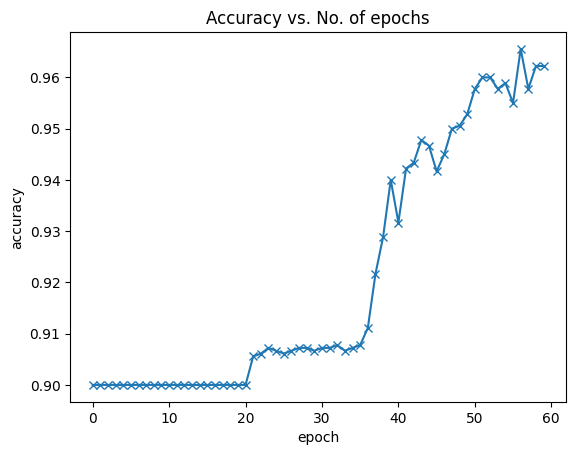

In [258]:
plot_accuracies(history)

In [259]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');


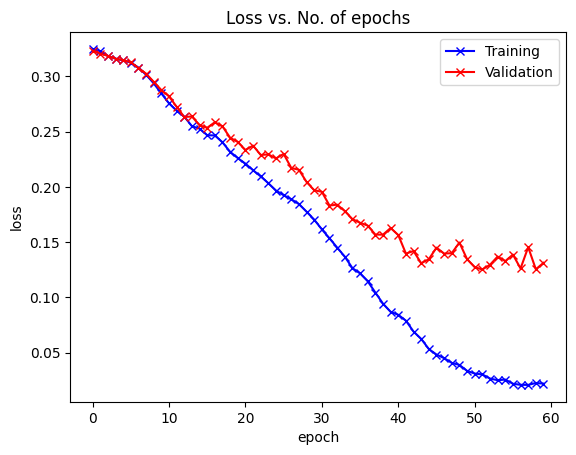

In [260]:
plot_losses(history)

In [261]:
torch.save(model.state_dict(), 'nlu.pth')

In [262]:
model2 = to_device(JigsawModel(), device)

In [263]:
model2.load_state_dict(torch.load('nlu.pth'))

<All keys matched successfully>

In [294]:
def predict_sentence(model,sentence):
    # Tokenize and preprocess the sentence
        prompt_text = sentence
        prompt_tokens = pad_tokens(tokenizer(prompt_text))
        input = torch.tensor(vocab.lookup_indices(prompt_tokens))
        tensor = torch.LongTensor(input).unsqueeze(0)  # convert to tensor and add batch dimension
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # print(tensor)

        # # Move tensor to the same device as the model
        tensor = tensor.to(device)

        # Forward pass
        outputs = model(tensor)
        probs = torch.softmax(outputs, dim=1)
        probs_np = probs.detach().cpu().numpy()

        # Find the class with the highest probability
        predicted_class = np.argmax(probs_np, axis=1)
        predicted_class_int = predicted_class.item()
        max_prob = np.max(probs_np).item()
        # Change print options
        np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
        if max_prob>0.6:
            print(f"Predicted class: {target_cols[predicted_class_int]} \n label_probability: {max_prob}")
        else:
            print("Model failed to predict the probability")



In [292]:
train_df

,prompt,label_forward,label_list,label_read,label_reply,label_send,label_star,label_trash,label_trash_list,label_unknown,label_untrash
10,I have an email to send.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
334,Execute text-to-speech for the open email.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Is it cool if I use you to erase this email?,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
678,Can you make forwarding this email as smooth a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,Can you narrate this email for me?,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,Show me my emails in chronological order.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,Can you make this email disappear forever? I d...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,Is there a way to access my deleted emails for...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
435,"Dude, draft a reply for me, please.",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
predict_sentence(model2,"Can you narrate this email for me?.")

Predicted class: label_read 
 label_probability: 0.8397333025932312


In [295]:
predict_sentence(model2,"Execute speech for email.")

Predicted class: label_send 
 label_probability: 0.9007872939109802


In [299]:
predict_sentence(model2,"Please make a reply")

Predicted class: label_reply 
 label_probability: 0.8705787062644958
